<a href="https://colab.research.google.com/github/claredavies/Image3DCoursework/blob/main/WarpAffine/WarpAffine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Warp affine transformations

## Task

Given a document image transform it to a scanner like perspective.

Use your own document image.

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [21]:
!git clone https://github.com/claredavies/Image3DCoursework.git

Cloning into 'Image3DCoursework'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 101 (delta 26), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (101/101), 11.59 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [22]:
%cd Image3DCoursework/WarpAffine

/content/Image3DCoursework/WarpAffine/Image3DCoursework/WarpAffine


In [35]:
img = cv2.imread("input/input.jpg")
im_scanned = cv2.imread("input/scanned.jpg")

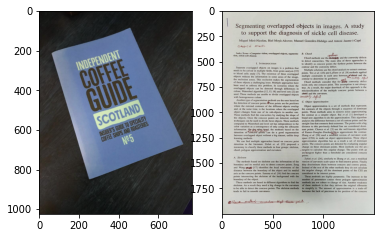

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img);
ax2.imshow(im_scanned);

## Interesting links

In [37]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (20,20,img.shape[1]-20,img.shape[0]-20)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

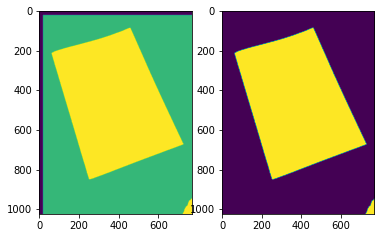

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(mask);
ax2.imshow(mask2);

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11, 11), 0)
# Edge Detection.
canny = cv2.Canny(gray, 0, 200)
canny = cv2.dilate(canny, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

In [40]:
# Blank canvas.
con = np.zeros_like(img)
# Finding contours for the detected edges.
contours, hierarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Keeping only the largest detected contour.
page = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
con = cv2.drawContours(con, page, -1, (0, 255, 255), 3)

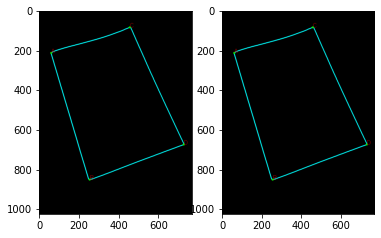

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(con);
ax2.imshow(con);

* [cv2.getAffineTransform documentation](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga8f6d378f9f8eebb5cb55cd3ae295a999)
* [cv2.warpAffine documentation](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983)